# **Implementation of Linear Regression model for Boston Dataset**

This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms. The dataset is small in size with only 506 cases.

**Variables**

There are 14 attributes in each case of the dataset. They are:
* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - $1000(Bk - 0.63)^2$ where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in \$1000's

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Exploratory Data Analysis**

### **Library declaration**



In [ ]:
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### **Reading File**

In [ ]:
FILE_PATH = "/content/drive/MyDrive/NPCI Bootcamp/Fundamentals of Machine Learning/In-Class-Problems/Datasets/Day03/Boston_housing.csv"
data = pd.read_csv(FILE_PATH)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


### **Description of Dataset**

In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   ZN      506 non-null    float64
 2   INDUS   506 non-null    float64
 3   CHAS    506 non-null    int64  
 4   NOX     506 non-null    float64
 5   RM      506 non-null    float64
 6   AGE     506 non-null    float64
 7   DIS     506 non-null    float64
 8   RAD     506 non-null    int64  
 9   TAX     506 non-null    int64  
 10  PT      506 non-null    float64
 11  B       506 non-null    float64
 12  LSTAT   506 non-null    float64
 13  MV      506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### **Checking Null Values**

In [ ]:
data.isnull().sum()

CRIM     0
ZN       0
INDUS    0
CHAS     0
NOX      0
RM       0
AGE      0
DIS      0
RAD      0
TAX      0
PT       0
B        0
LSTAT    0
MV       0
dtype: int64

### **Visual Analysis using Scatter Plot**


In [ ]:
FEATURES = data.columns[:-1].to_list()
LABEL = "MV"

FEATURES, LABEL

(['CRIM',
  'ZN',
  'INDUS',
  'CHAS',
  'NOX',
  'RM',
  'AGE',
  'DIS',
  'RAD',
  'TAX',
  'PT',
  'B',
  'LSTAT'],
 'MV')

In [ ]:
from typing import List

def plot_scatter(df: pd.DataFrame, features: List[str], label: str) -> None:
    plt.figure(figsize=(20, 20))
    for loc, feature in enumerate(features):
        ax = plt.subplot(4, 4, loc+1)
        sns.scatterplot(x=feature, y=label, data=df, color='#288BA8')
    plt.show()
    plt.close()
    return None 

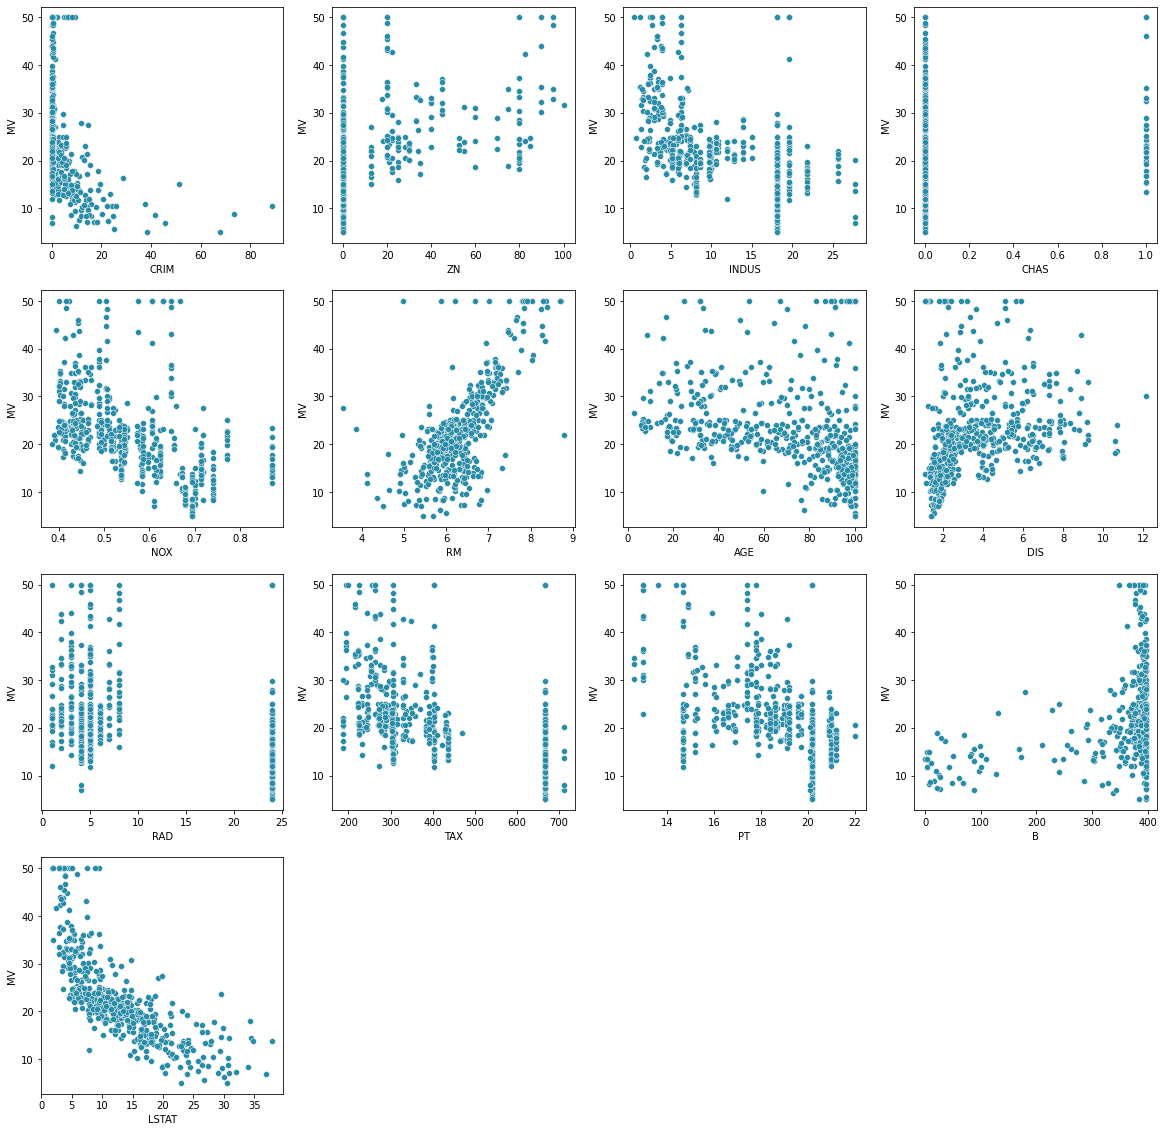

In [ ]:
plot_scatter(data, FEATURES, LABEL)

### **Visual Analysis using Histplot**

In [ ]:
def plot_hist(df: pd.DataFrame, features: List[str]) -> None:
    plt.figure(figsize=(20, 20))
    for loc, feature in enumerate(features):
        ax = plt.subplot(4, 4, loc+1)
        sns.histplot(df[feature], color='#E83845')
    plt.show()
    plt.close()
    return None 

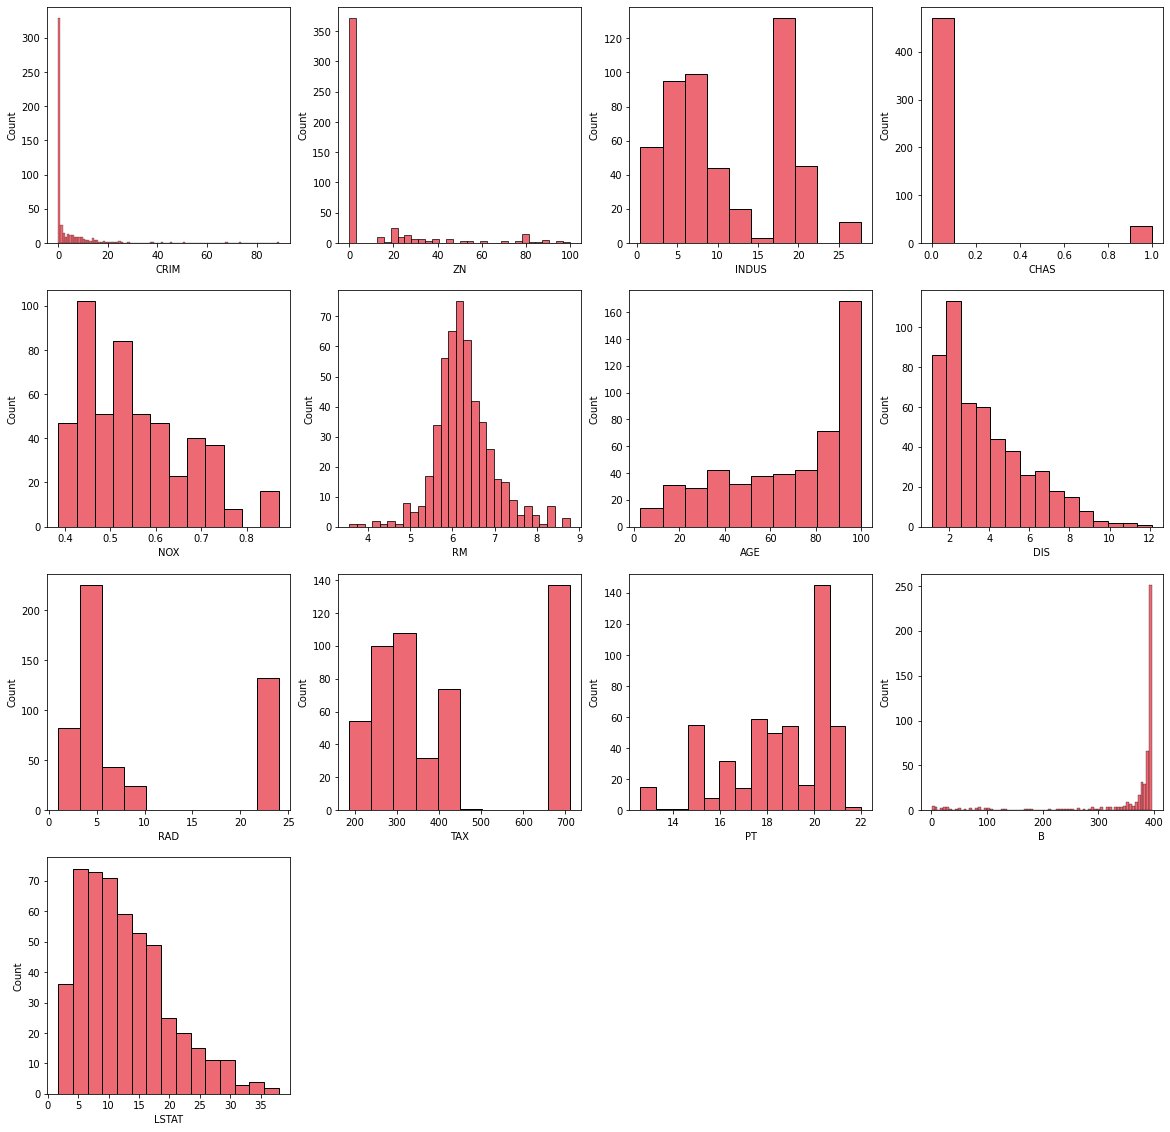

In [ ]:
plot_hist(data, FEATURES)

### **Heat map for Correlation**

In [ ]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355502,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


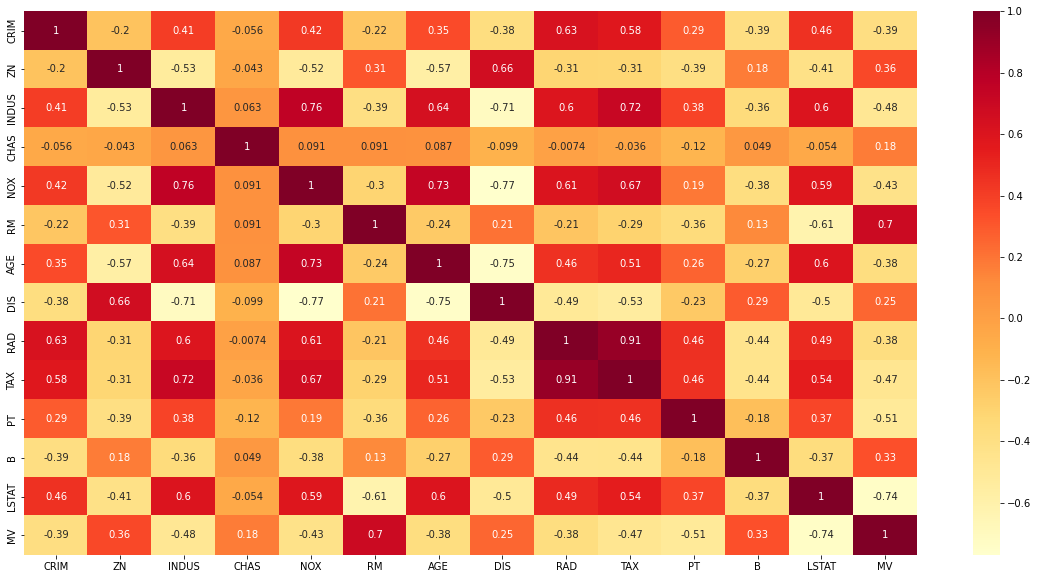

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True, cmap='YlOrRd')
plt.show()
plt.close()

###  **Train Test Split**

In [ ]:
features = data.drop(['MV'], axis=1)
target = data['MV']

X_train , X_test, y_train , y_test = train_test_split(features, target, test_size=0.3, random_state=42)

for each in [X_train , X_test, y_train, y_test]:
    print(f"Shape: {each.shape}")

Shape: (354, 13)
Shape: (152, 13)
Shape: (354,)
Shape: (152,)


In [ ]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT
5,0.02985,0.0,2.18,0,0.458,6.430,58.700001,6.0622,3,222,18.700001,394.119995,5.210000
116,0.13158,0.0,10.01,0,0.547,6.176,72.500000,2.7301,6,432,17.799999,393.299988,12.040000
45,0.17142,0.0,6.91,0,0.448,5.682,33.799999,5.1004,3,233,17.900000,396.899994,10.210000
16,1.05393,0.0,8.14,0,0.538,5.935,29.299999,4.4986,4,307,21.000000,386.850006,6.580000
468,15.57570,0.0,18.10,0,0.580,5.926,71.000000,2.9084,24,666,20.200001,368.739990,18.129999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.900002,2.2110,5,384,20.900000,395.670013,18.660000
270,0.29916,20.0,6.96,0,0.464,5.856,42.099998,4.4290,3,223,18.600000,388.649994,13.000000
348,0.01501,80.0,2.01,0,0.435,6.635,29.700001,8.3440,4,280,17.000000,390.940002,5.990000
435,11.16040,0.0,18.10,0,0.740,6.629,94.599998,2.1247,24,666,20.200001,109.849998,23.270000


##  **Model Building**

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

print(f"Bias: {linear_model.intercept_}")
print(f"Weights (m1, m2, ...., mn): \n\n{linear_model.coef_}")

Bias: 31.6310870119216
Weights (m1, m2, ...., mn): 

[-1.33470111e-01  3.58089136e-02  4.95227006e-02  3.11983509e+00
 -1.54170644e+01  4.05719893e+00 -1.08208344e-02 -1.38599817e+00
  2.42727390e-01 -8.70223437e-03 -9.10685209e-01  1.17941160e-02
 -5.47113335e-01]


In [ ]:
train_preds = linear_model.predict(X_train)
test_preds = linear_model.predict(X_test)

### **RMSE Value of Model**

$ RMSE = \sqrt{\frac{\sum{(y_{actual} - y_{predicted}})^2}{n}} $

In [ ]:
def rmse_calculation(actual_train, pred_train, actual_test, pred_test):
    return f"RMSE Train: {sqrt(mean_squared_error(actual_train , pred_train)):.3f}\nRMSE Test: {sqrt(mean_squared_error(actual_test , pred_test)):.3f}"

In [ ]:
def score_calculation(model, X_train, X_test, y_train , y_test):
    return f"Train Score: {model.score(X_train, y_train)*100:.3f}\nTest Score: {model.score(X_test, y_test)*100:.3f}" 

In [ ]:
print(score_calculation(linear_model, X_train, X_test, y_train, y_test))
print('-'*25)
print(rmse_calculation(y_train, train_preds, y_test, test_preds))

Train Score: 74.350
Test Score: 71.123
-------------------------
RMSE Train: 4.748
RMSE Test: 4.639


### **Error Histogram/Distplot**

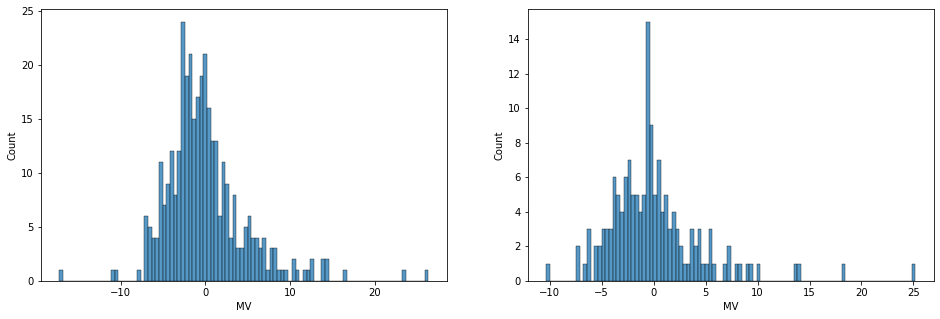

In [ ]:
train_error = (y_train - train_preds)
test_error = (y_test - test_preds)

fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(121)
sns.histplot(train_error, bins=100)

ax2 = fig.add_subplot(122)
sns.histplot(test_error, bins=100)
plt.show()
plt.close()

In [ ]:
actual_vs_pred_data = pd.DataFrame({'Actual MEDV': y_test.values, 'Predicted_values': test_preds})
actual_vs_pred_data.head(10)

,Actual MEDV,Predicted_values
0,23.600000,28.648959
1,32.400002,36.495013
2,13.600000,15.411192
3,22.799999,25.403213
4,16.100000,18.855279
5,20.000000,23.146689
6,17.799999,17.392124
7,14.000000,14.078597
8,19.600000,23.036928
9,16.799999,20.599433


## **Things to consider when buiding a model**

* Overfit -> Memorize training data. Performs poorly in test data.
* Underfit -> No relevant features so both training and test data will be poorly predicted.
* Perfectfit -> Considerably high training and test predictions also needs to be nearly equal.

# **Principal Compenent Analysis**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
transformed_X_train = pca.fit_transform(X_train)
pd.DataFrame(transformed_X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-187.581184,15.274240,-14.936630,12.255072,1.650387,-5.852324,-3.688574,0.974052,1.301833,1.293861,0.264179,-0.028247,0.029084
1,15.685791,-38.869739,-8.434922,6.904070,-4.538202,-0.454664,-0.516638,4.848349,-0.705331,-0.596157,0.128987,-0.041731,-0.025739
2,-179.465095,9.707675,4.266256,27.731763,3.155888,2.572646,-0.147217,-0.755888,-0.444029,0.188268,0.522214,-0.014026,-0.015795
3,-106.178669,0.007788,14.700646,31.932314,0.905503,-0.659565,1.867168,0.987977,2.444365,-0.930718,0.329067,0.004947,0.098927
4,248.046587,-76.526051,12.630812,11.696154,6.102403,0.837523,0.046908,-1.451743,-0.266526,0.381810,-0.062660,-0.077145,-0.061612
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,-29.356045,-28.545329,-28.215692,-6.005836,-2.134127,3.853528,-4.403281,4.340694,2.310595,-1.485113,0.075142,0.016320,-0.043541
350,-187.023913,20.214559,9.191693,6.736715,3.861371,5.262121,-0.480027,-2.324290,0.634067,-1.094014,0.332777,-0.031075,-0.010444
351,-136.752681,2.786500,61.846600,-31.569058,1.054887,0.870913,0.028027,-2.055665,1.241311,0.498711,0.198313,-0.044827,0.050431
352,317.241067,173.375141,1.162266,-2.588096,-0.326331,2.149674,-3.098552,-0.900063,0.112184,0.095023,-0.768543,-0.034141,0.051112


In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.80644002, 0.96819678, 0.99030662, 0.99702915, 0.99831606,
       0.9991415 , 0.99960655, 0.99986238, 0.99995771, 0.99999091,
       0.99999824, 0.99999992, 1.        ])

In [ ]:
pca = PCA(n_components=10)
transformed_X_train = pca.fit_transform(X_train)
transformed_X_test = pca.transform(X_test)
 
linear_model = LinearRegression()
linear_model.fit(transformed_X_train, y_train)

LinearRegression()

In [ ]:
pd.DataFrame(transformed_X_train)

,0,1,2,3,4,5,6,7,8,9
0,-187.581184,15.274240,-14.936630,12.255072,1.650387,-5.852324,-3.688574,0.974052,1.301833,1.293861
1,15.685791,-38.869739,-8.434922,6.904070,-4.538202,-0.454664,-0.516638,4.848349,-0.705331,-0.596157
2,-179.465095,9.707675,4.266256,27.731763,3.155888,2.572646,-0.147217,-0.755888,-0.444029,0.188268
3,-106.178669,0.007788,14.700646,31.932314,0.905503,-0.659565,1.867168,0.987977,2.444365,-0.930718
4,248.046587,-76.526051,12.630812,11.696154,6.102403,0.837523,0.046908,-1.451743,-0.266526,0.381810
...,...,...,...,...,...,...,...,...,...,...
349,-29.356045,-28.545329,-28.215692,-6.005836,-2.134127,3.853528,-4.403281,4.340694,2.310595,-1.485113
350,-187.023913,20.214559,9.191693,6.736715,3.861371,5.262121,-0.480027,-2.324290,0.634067,-1.094014
351,-136.752681,2.786500,61.846600,-31.569058,1.054887,0.870913,0.028027,-2.055665,1.241311,0.498711
352,317.241067,173.375141,1.162266,-2.588096,-0.326331,2.149674,-3.098552,-0.900063,0.112184,0.095023


In [ ]:
pd.DataFrame(transformed_X_test)

,0,1,2,3,4,5,6,7,8,9
0,-114.712718,-5.393680,-28.671860,-2.441074,-0.767887,-5.189873,-4.667297,2.238983,-1.323794,-0.690312
1,-161.198263,3.991377,31.948466,-2.454302,1.130940,-2.084977,2.871283,-3.152272,0.330353,-2.040774
2,286.777312,-108.766003,-6.190055,-4.955207,-15.388846,6.452756,12.241004,11.569080,1.952644,0.333088
3,-110.841215,-3.413805,30.915881,45.244167,0.468170,1.431965,5.140188,-0.591407,0.491680,-0.170308
4,245.121776,-92.296700,-3.681229,-0.949790,-4.737816,-0.231828,-2.672547,-2.736732,0.000119,0.254718
...,...,...,...,...,...,...,...,...,...,...
147,245.505602,-93.119119,-8.146075,-4.470004,-0.023636,0.532151,-2.618548,-2.006656,-0.040387,0.141054
148,-102.299822,-7.289659,-41.249699,-12.291923,1.099151,4.552007,-5.159270,2.100078,3.104958,0.414212
149,-100.624970,4.701176,-26.289877,-1.283520,-1.361106,-9.307011,-2.740243,-0.996488,-0.515920,-0.448531
150,318.907580,182.654516,7.292132,1.933982,-7.010846,-2.778673,-1.793481,-1.911751,0.449012,0.125016


In [ ]:
y_test

173    23.600000
274    32.400002
491    13.600000
72     22.799999
452    16.100000
         ...    
441    17.100000
23     14.500000
225    50.000000
433    14.300000
447    12.600000
Name: MV, Length: 152, dtype: float64

In [ ]:
train_preds = linear_model.predict(transformed_X_train) 
test_preds = linear_model.predict(transformed_X_test) 

test_preds.shape

(152,)

In [ ]:
transformed_X_train.shape, transformed_X_test.shape, y_train.shape, y_test.shape

((354, 10), (152, 10), (354,), (152,))

In [ ]:
print(score_calculation(linear_model, transformed_X_train, transformed_X_test, y_train, y_test))
print('-'*25)
print(rmse_calculation(y_train, train_preds, y_test, test_preds))

Train Score: 67.893
Test Score: 65.785
-------------------------
RMSE Train: 5.312
RMSE Test: 5.049
